In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../data/base_dades_neta.csv")

# Relacions en referencia a l'influència que tenen en el preu de l'habitatge

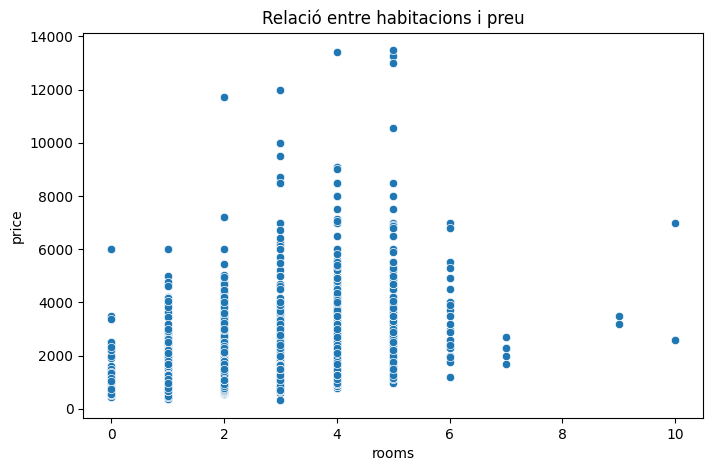

La correlació entre preu i nombre d'habitacions és: 0.37



In [84]:
# 1. Relació entre nombre d'habitacions i preu
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rooms', y='price', data=df)
plt.title("Relació entre habitacions i preu")
plt.show()
# Calcular correlació
correlacio_rooms = df['price'].corr(df['rooms'])
print(f"La correlació entre preu i nombre d'habitacions és: {correlacio_rooms:.2f}\n")

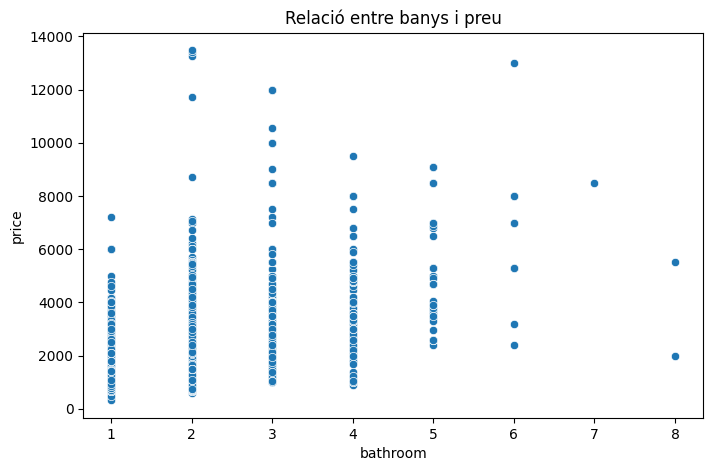

La correlació entre preu i nombre de banys és: 0.61



In [57]:
# 2. Relació entre nombre de banys i preu
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bathroom', y='price', data=df)
plt.title("Relació entre banys i preu")
plt.show()
# Calcular correlació
correlacio_bathroom = df['price'].corr(df['bathroom'])
print(f"La correlació entre preu i nombre de banys és: {correlacio_bathroom:.2f}\n")

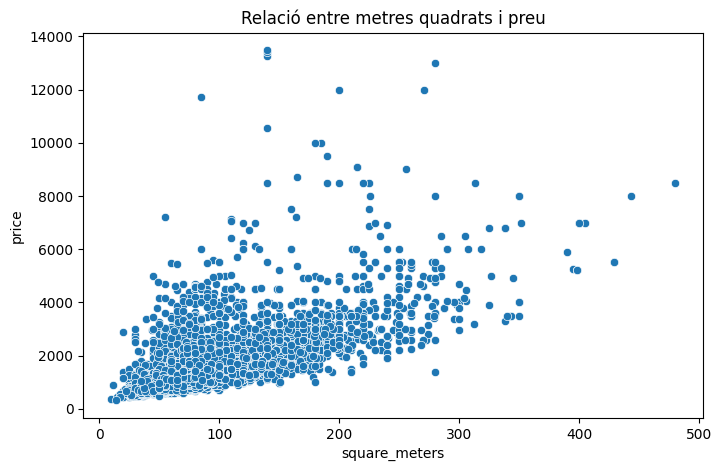

La correlació entre preu i metres quadrats és: 0.68



In [58]:
# 3. Relació entre metres quadrats i preu
plt.figure(figsize=(8, 5))
sns.scatterplot(x='square_meters', y='price', data=df)
plt.title("Relació entre metres quadrats i preu")
plt.show()
# Calcular correlació
correlacio_square_meters = df['price'].corr(df['square_meters'])
print(f"La correlació entre preu i metres quadrats és: {correlacio_square_meters:.2f}\n")

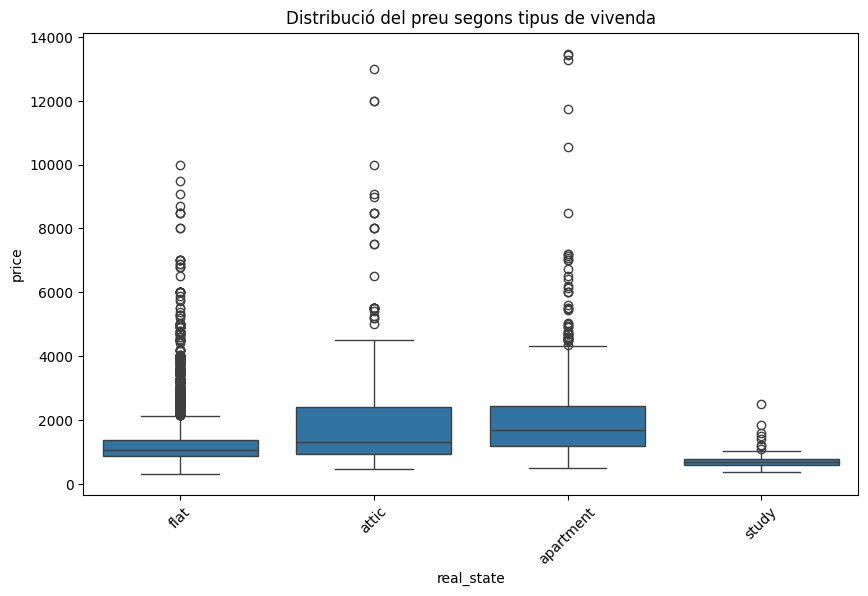

Mitjana del preu per tipus de vivenda:
real_state
study         735.990826
flat         1304.796983
apartment    2034.255319
attic        2066.742857
Name: price, dtype: float64 



In [59]:
# 4. Distribució del preu segons tipus de vivenda
plt.figure(figsize=(10, 6))
sns.boxplot(x='real_state', y='price', data=df)
plt.title("Distribució del preu segons tipus de vivenda")
plt.xticks(rotation=45)
plt.show()

# Percentatges i mitjanes
tipus_vivenda_means = df.groupby('real_state')['price'].mean().sort_values()
print("Mitjana del preu per tipus de vivenda:")
print(tipus_vivenda_means, "\n")

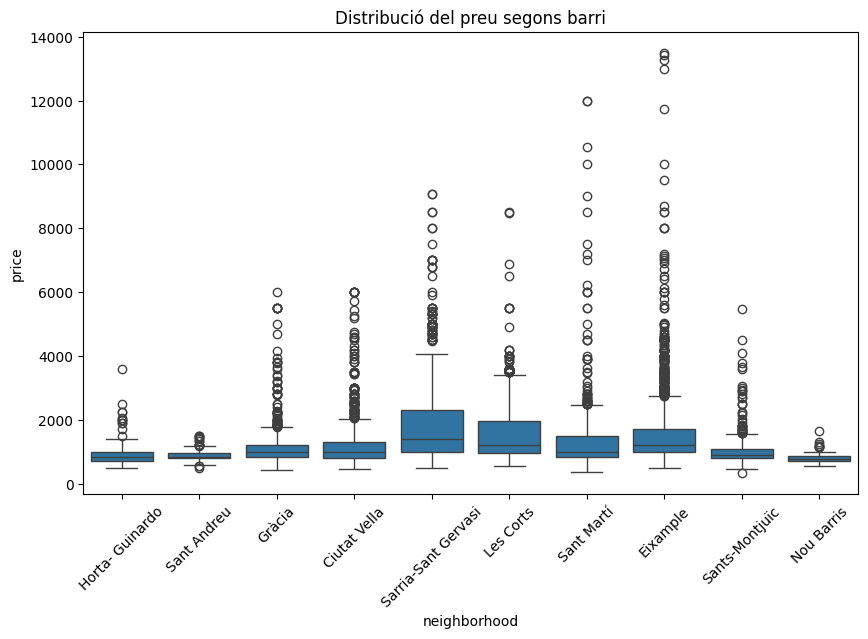

Mitjana del preu per barri:
neighborhood
Nou Barris              807.921053
Sant Andreu             899.657303
Horta- Guinardo         903.453968
Sants-Montjuïc         1028.233898
Gràcia                 1183.084425
Ciutat Vella           1195.557185
Sant Martí             1419.754870
Eixample               1586.560417
Les Corts              1610.748092
Sarria-Sant Gervasi    1846.512987
Name: price, dtype: float64 



In [60]:
# 5. Distribució del preu segons barri
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighborhood', y='price', data=df)
plt.title("Distribució del preu segons barri")
plt.xticks(rotation=45)
plt.show()

# Percentatges i mitjanes
barris_means = df.groupby('neighborhood')['price'].mean().sort_values()
print("Mitjana del preu per barri:")
print(barris_means, "\n")

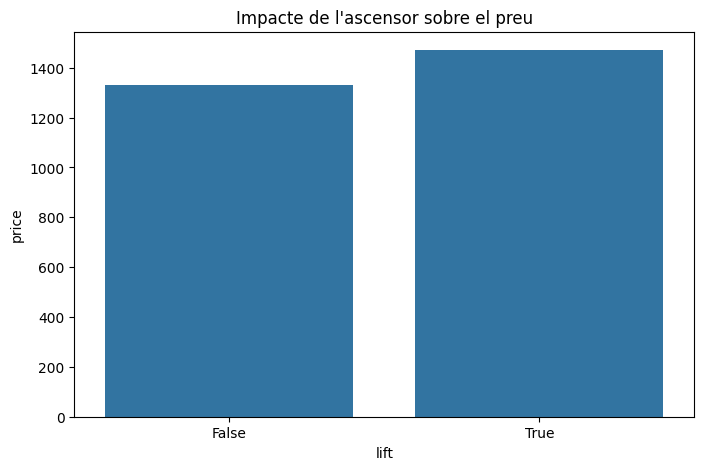

El preu mitjà amb ascensor=True és 10.63% més alt.



In [61]:
# 6. Impacte de tenir ascensor sobre el preu
plt.figure(figsize=(8, 5))
sns.barplot(x='lift', y='price', data=df, errorbar=None)
plt.title("Impacte de l'ascensor sobre el preu")
plt.show()

# Diferència percentual
means_lift = df.groupby('lift')['price'].mean()
percent_diff_lift = ((means_lift.iloc[1] - means_lift.iloc[0]) / means_lift.iloc[0]) * 100
print(f"El preu mitjà amb ascensor=True és {percent_diff_lift:.2f}% més alt.\n")

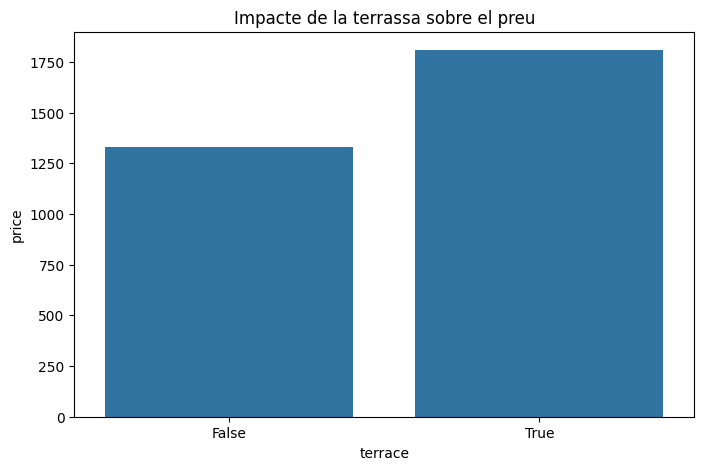

El preu mitjà amb terrassa=True és 35.86% més alt.



In [62]:
# 7. Impacte de tenir terrassa sobre el preu
plt.figure(figsize=(8, 5))
sns.barplot(x='terrace', y='price', data=df, errorbar=None)
plt.title("Impacte de la terrassa sobre el preu")
plt.show()

# Diferència percentual
means_terrace = df.groupby('terrace')['price'].mean()
percent_diff_terrace = ((means_terrace.iloc[1] - means_terrace.iloc[0]) / means_terrace.iloc[0]) * 100
print(f"El preu mitjà amb terrassa=True és {percent_diff_terrace:.2f}% més alt.\n")



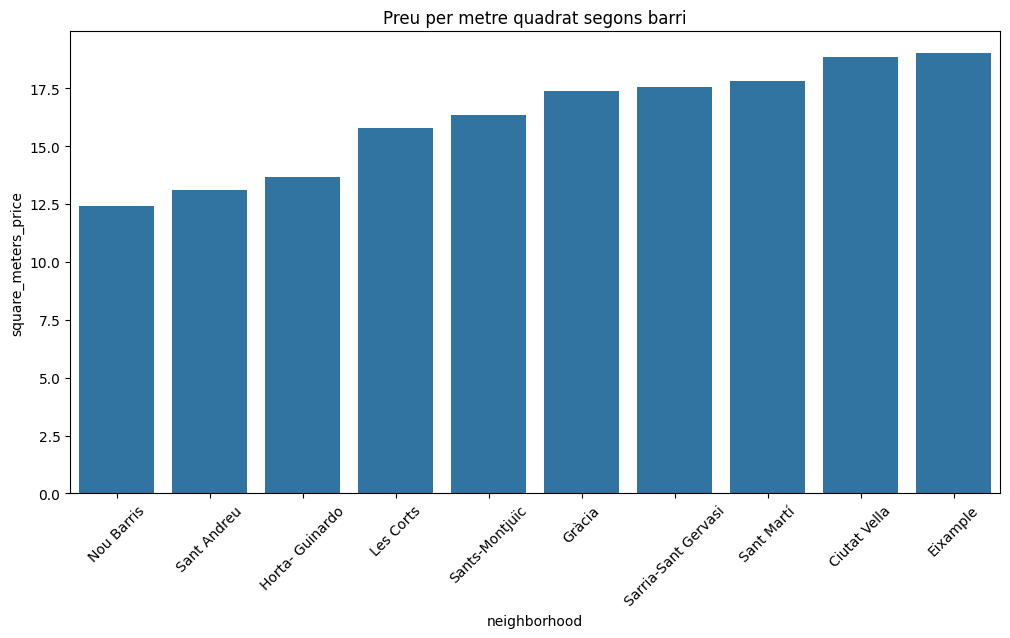

El barri més car té un 53.10% més de preu per metre quadrat que el més econòmic.



In [63]:
# 8. Distribució del preu per metre quadrat segons barri
plt.figure(figsize=(12, 6))
sns.barplot(x='neighborhood', y='square_meters_price', data=df, errorbar=None, 
            order=df.groupby('neighborhood')['square_meters_price'].mean().sort_values().index)
plt.title("Preu per metre quadrat segons barri")
plt.xticks(rotation=45)
plt.show()

# Percentatges de diferència
max_price_per_m2 = df.groupby('neighborhood')['square_meters_price'].mean().max()
min_price_per_m2 = df.groupby('neighborhood')['square_meters_price'].mean().min()
percent_diff_m2 = ((max_price_per_m2 - min_price_per_m2) / min_price_per_m2) * 100
print(f"El barri més car té un {percent_diff_m2:.2f}% més de preu per metre quadrat que el més econòmic.\n")

# Casos pràctics

### Familia de 5 persones
Comparació de 4 o 5 habitacions i amb/sense ascensor i terrassa

In [9]:
# Vivendes que tinguin 4 habitacions, 1 bany, sense ascensor i sense terrassa
df[
    (df['rooms'] >= 4) & 
    (df['bathroom'] == 1) & 
    (df['terrace'] == False) & 
    (df['lift'] == False)
].nsmallest(5, 'price')


,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
3273,3397,775,4,1,False,False,70,flat,Les Corts,11.071429
5301,5508,775,4,1,False,False,66,flat,Eixample,11.742424
4563,4730,800,4,1,False,False,65,attic,Horta- Guinardo,12.307692
1039,1088,815,4,1,False,False,60,flat,Sant Martí,13.583333
3623,3758,850,4,1,False,False,60,flat,Sants-Montjuïc,14.166667


In [10]:
# Vivendes que tinguin 4 habitacions, 1 bany, amb ascensor i sense terrassa
df[
    (df['rooms'] >= 4) & 
    (df['bathroom'] == 1) & 
    (df['terrace'] == False) & 
    (df['lift'] == True)
].nsmallest(5, 'price')

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
4949,5133,790,4,1,True,False,65,flat,Nou Barris,12.153846
3369,3498,795,4,1,True,False,61,flat,Eixample,13.032787
5184,5380,795,4,1,True,False,73,flat,Horta- Guinardo,10.890411
4008,4155,825,4,1,True,False,72,apartment,Sants-Montjuïc,11.458333
2880,2989,850,4,1,True,False,70,flat,Sant Andreu,12.142857


In [11]:
# Vivendes que tinguin 4 habitacions, 1 bany, amb ascensor i amb terrassa
df[
    (df['rooms'] >= 4) & 
    (df['bathroom'] == 1) & 
    (df['terrace'] == True) & 
    (df['lift'] == True)
].nsmallest(5, 'price')

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
5529,5747,850,4,1,True,True,75,flat,Sant Martí,11.333333
999,1047,890,4,1,True,True,92,flat,Sant Andreu,9.673913
5895,6119,890,4,1,True,True,75,flat,Eixample,11.866667
6390,6624,900,4,1,True,True,80,flat,Sarria-Sant Gervasi,11.250000
2668,2775,920,4,1,True,True,92,flat,Sant Andreu,10.000000


In [12]:
# Vivendes que tinguin 5 habitacions, 2 banys, amb ascensor i amb terrassa
df[
    (df['rooms'] >= 5) & 
    (df['bathroom'] == 2) & 
    (df['terrace'] == True) & 
    (df['lift'] == True)
].nsmallest(5, 'price')

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
5772,5996,1200,5,2,True,True,112,flat,Ciutat Vella,10.714286
5158,5353,1375,5,2,True,True,151,flat,Eixample,9.105960
4986,5171,1450,5,2,True,True,155,flat,Eixample,9.354839
1168,1224,1500,5,2,True,True,140,flat,Sant Andreu,10.714286
4886,5064,1500,5,2,True,True,110,flat,Sarria-Sant Gervasi,13.636364
